# AVOCADO PRICES DATA ANALYSIS

Summary of what this project is about.

* This project is an exploratory data analysis project.
* I'll be using the avocado prices dataset to conduct this analysis.
* I'll clean the data, then conduct some analysis and visualizations.
* In the end, we'll have answered some questions from the data.
* These questions will be outlined as comments before code.
* FYI, I have used Google Colab for this project.

Enjoy.


In [ ]:
pip install opendatasets --upgrade --quiet

In [204]:
# import relevant python modules
# take note of the opendatasets library!
# credit for opendatasets library goes to Aditya Prasad,  Jovian on YT

import opendatasets as od # helps fetch data directly from kaggle
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [6]:
# opendatasets import data into Jupyter, without storing on your PC.
# Go to page that contains data, run below code, insert API key

avocado_url = 'https://www.kaggle.com/timmate/avocado-prices-2020'
od.download(avocado_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: brightezeoha
Your Kaggle Key: ··········


100%|██████████| 1.13M/1.13M [00:00<00:00, 103MB/s]

In [7]:
# pass the file path into a variable
datafile = './avocado-prices-2020/avocado-updated-2020.csv'

In [8]:
# read variable as csv and view first 5 rows

pear = pd.read_csv(datafile)
pear.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


# 1. Data Cleaning

In [9]:
# some columns seem wrong, let's rename them

pear = pear.rename(columns = {'4046':'small', '4225':'large', '4770':'xlarge'})
pear.head()

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [11]:
# let's review the data types, this is important.

pear.dtypes

date              object
average_price    float64
total_volume     float64
small            float64
large            float64
xlarge           float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

We can see in the above that date is of datatype object, we will to change this.

In [12]:
# let's look for any missing values

pear.isna().values.any()

False

In [13]:
# let's look for duplicate values

pear.duplicated().values.any()

False

In [55]:
# how many different locations are there in the data?

pear['geography'].nunique()

54

In [61]:
# names of all the locations in the data

pear['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

From the above, we have some subtotals in the data, listed as;
 * Total US
 * Northeast
 * Midsouth
 * South Central
 * Southeast, and
 * West
 
For this analysis, I don't need the subtotals, hence, I will filter them out.

In [65]:
total_pear = pear.loc[pear['geography'] == 'Total U.S.']

In [66]:
total_pear.head()

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
102,2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,Total U.S.
103,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,Total U.S.
210,2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,Total U.S.
211,2015-01-11,1.42,669528.88,270966.74,260971.60,3830.42,133760.12,106844.49,26915.63,0.00,organic,2015,Total U.S.
318,2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,Total U.S.


In [166]:
# filter out 'Total' US in the geography column

pear = pear.loc[pear['geography'] != 'Total U.S.']

In [167]:
pear = pear.loc[pear['geography'] != 'Northeast']

In [168]:
pear = pear.loc[pear['geography'] != 'Midsouth']

In [169]:
pear = pear.loc[pear['geography'] != 'South Central']

In [170]:
pear = pear.loc[pear['geography'] != 'Southeast']

In [171]:
pear = pear.loc[pear['geography'] != 'West']

In [194]:
# how many different locations are there in the data?

pear['geography'].nunique()

48

Initially we had 54 unique locations, we filtered out 6 and now we have 48.

In [172]:
# how many rows, columns do we have in the data.

pear.shape

(29373, 14)

In [173]:
# convert the date to the right data type

pear['date'] = pear['date'].astype('datetime64[ns]')

In [174]:
# ceck to see if code worked

pear['date'].head()

0   2015-01-04
1   2015-01-04
2   2015-01-04
3   2015-01-04
4   2015-01-04
Name: date, dtype: datetime64[ns]

In [175]:
# check all data types

pear.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
small                   float64
large                   float64
xlarge                  float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
geography                object
month                    object
dtype: object

# 2. Summary Statistics & Exploratory Data Analysis

In [193]:
# summary statistics

pear.describe()

,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,year
count,29373.000000,2.937300e+04,2.937300e+04,2.937300e+04,29373.000000,2.937300e+04,2.937300e+04,2.937300e+04,29373.000000,29373.000000
mean,1.385951,3.969911e+05,1.176788e+05,1.186782e+05,11244.410539,1.493359e+05,1.059675e+05,3.915786e+04,4210.531002,2017.460899
std,0.384179,8.752849e+05,3.050917e+05,2.832787e+05,42664.431891,3.564222e+05,2.601095e+05,1.101372e+05,24966.658241,1.699752
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.288030e+04,5.489400e+02,2.146330e+03,0.000000,7.719800e+03,5.005470e+03,2.775100e+02,0.000000,2016.000000
50%,1.350000,9.420900e+04,7.086890e+03,1.709910e+04,100.000000,4.081060e+04,2.654450e+04,4.304080e+03,0.000000,2017.000000
75%,1.620000,4.065207e+05,9.453673e+04,9.508510e+04,3385.240000,1.311426e+05,9.365131e+04,2.768854e+04,513.330000,2019.000000
max,3.250000,1.132468e+07,4.794142e+06,4.097592e+06,794742.870000,6.301211e+06,4.017035e+06,2.389750e+06,730833.290000,2020.000000


In [177]:
# unique list of all locations

pear['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Nashville', 'New Orleans/Mobile', 'New York',
       'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'West Tex/New Mexico'],
      dtype=object)

In [178]:
# which type of avocado sold more, we will visualize this later
pear.groupby(['type']).sum().round()['total_volume'].astype('int64')

type
conventional    11261400966
organic           399417420
Name: total_volume, dtype: int64

In [195]:
# Average price of avocado in each year

pear.groupby(['year']).mean()['average_price']

year
2015    1.382603
2016    1.345453
2017    1.522934
2018    1.359938
2019    1.405994
2020    1.287101
Name: average_price, dtype: float64

In [196]:
# Average price of avocado overall

pear['average_price'].mean()

1.3859510434752993

In [197]:
# Average price by type

pear.groupby(['type']).mean()['average_price']

type
conventional    1.150897
organic         1.621053
Name: average_price, dtype: float64

In [198]:
# Total volume of avocados

pear['total_volume'].sum()

11660818386.48

In [199]:
# Total volume by geography

pear.groupby(['geography']).sum()['total_volume'].astype(int)

geography
Albany                    34816335
Atlanta                  198994117
Baltimore/Washington     276764634
Boise                     30359552
Boston                   204132518
Buffalo/Rochester         51200924
California              1991888301
Charlotte                 81281272
Chicago                  257665010
Cincinnati/Dayton         92732806
Columbus                  65936749
Dallas/Ft. Worth         436204160
Denver                   277929528
Detroit                  140022779
Grand Rapids              58969797
Great Lakes             1220448350
Harrisburg/Scranton       93976397
Hartford/Springfield     104604965
Houston                  420843846
Indianapolis              66405884
Jacksonville              62207464
Las Vegas                108850752
Los Angeles              959350488
Louisville                34892671
Miami/Ft. Lauderdale     231744848
Nashville                 77453749
New Orleans/Mobile        94666571
New York                 528245244
Northern N

In [203]:
# top 3 locations by volume 
top3 = pear.groupby(['geography']).sum()[['total_volume']].astype(int)
top3.nlargest(5, 'total_volume')

,total_volume
geography,
California,1991888301
Great Lakes,1220448350
Los Angeles,959350488
Plains,635257613
New York,528245244







# 3. Data Visualization






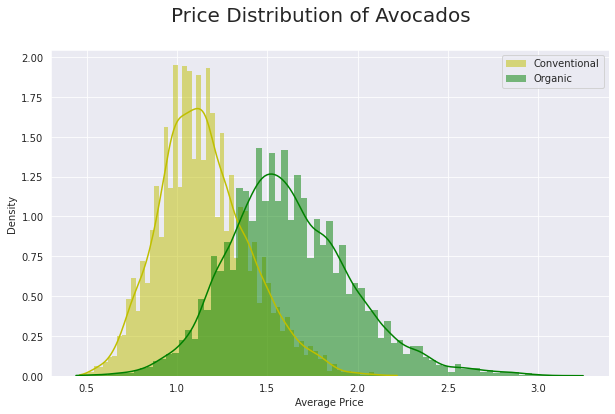

In [179]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Price Distribution of Avocados', fontsize = 20)
ax1 = sns.histplot(pear[pear['type']=='conventional']["average_price"],
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(pear[pear['type']=='organic']["average_price"],
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel('Average Price')
plt.legend(title_fontsize = 12)
plt.show()

We can see the spread of price by avocado type & here are some deductions.

* Highest price of conventional avocados reaches about USD2.00
* Higghest price of organic avocados reachers over USD3.00
* Expectedly, average price of conventional type is just over USD1.00
* While average price of organic type hovers around USD1.5 - USD1.6
* Overall average of both types come in around USD1.35 - USD1.40
* On balance, conventional types sold more.

Let's get further insights.

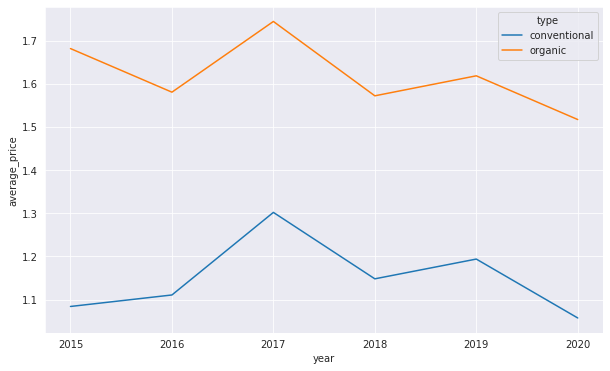

In [180]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=pear, x="year", y="average_price", hue="type", ci = None)
plt.show()

We can see a pattern, but we need to dig deeper, hence, let's view by month.

This will give us a longer, more detailed chart, in the next line.

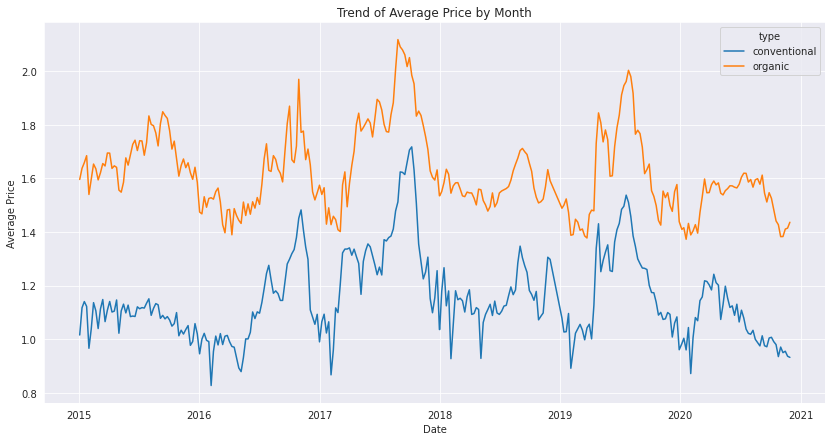

In [181]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title('Trend of Average Price by Month')
ax.set_xlabel('Date')
ax.set_ylabel('Average Price')
sns.lineplot(data=pear, x="date", y="average_price", hue="type", ci=None)
plt.show()

**We can see a pattern here as follows;**
* Both types of avocados have a similar average price trend.
* A sharp rise around July.
* A decline towards the end of the year.

Next, let's zoom into this trend for more insights.

We'll do that by visualizing average price by month, per year.

In [182]:
# To achieve what we set out above, we need to add a month column

pear['month'] = pear['date'].apply(lambda x: x.strftime(format='%m'))

In [183]:
# check if the code worked, it did

pear.tail(2)

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,11
33044,2020-11-29,1.35,24106.58,1236.96,617.80,1564.98,20686.84,17824.52,2862.32,0.00,organic,2020,West Tex/New Mexico,11


In [184]:


data = pear.loc[pear['year']==2015, ['month', 'average_price']]
pp_2015 = data.groupby(['month']).mean().round(2)

data = pear.loc[pear['year']==2016, ['month', 'average_price']]
pp_2016 = data.groupby(['month']).mean().round(2)

data = pear.loc[pear['year']==2017, ['month', 'average_price']]
pp_2017 = data.groupby(['month']).mean().round(2)

data = pear.loc[pear['year']==2018, ['month', 'average_price']]
pp_2018 = data.groupby(['month']).mean().round(2)

data = pear.loc[pear['year']==2019, ['month', 'average_price']]
pp_2019 = data.groupby(['month']).mean().round(2)

data = pear.loc[pear['year']==2020, ['month', 'average_price']]
pp_2020 = data.groupby(['month']).mean().round(2)

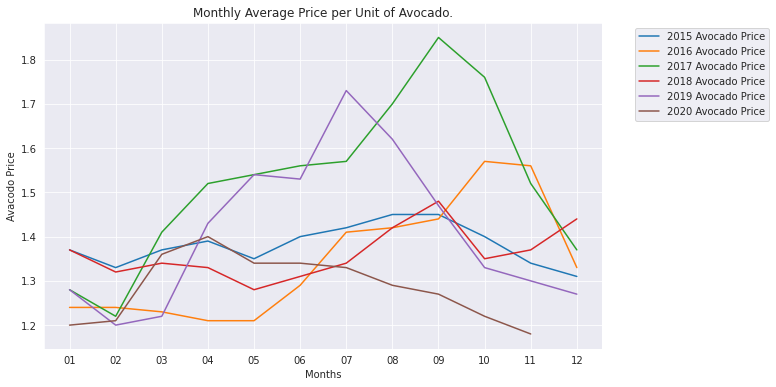

In [185]:
# Visualization for the Monthly Average Price of Avocado

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(pp_2015, label='2015 Avocado Price')
plt.plot(pp_2016, label='2016 Avocado Price')
plt.plot(pp_2017,  label='2017 Avocado Price')
plt.plot(pp_2018, label='2018 Avocado Price')
plt.plot(pp_2019, label='2019 Avocado Price')
plt.plot(pp_2020, label='2020 Avocado Price')

ax.set_xlabel("Months")
ax.set_ylabel("Avacodo Price")
ax.set_title("Monthly Average Price per Unit of Avocado.")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

We can see some observations as follows;

* Average prices usually dropped in February, for every year.
* Average prices peaked in July every year, except in year 2020.
* Average prices also tend to drop at the end of the year, except in 2018.
* From April, prices dropped steadily in 2020;
  * This could be attributed to the impact of COVID19 lockdowns.

It will be interesting to see if this trend continues in future years!

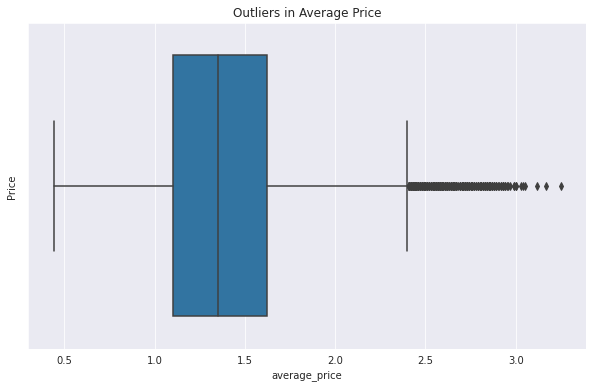

In [186]:
# Check Outliers in Average price.
ax = plt.figure(figsize=(10, 6))

sns.boxplot(x='average_price', data = pear, hue = 'type')
plt.ylabel("Price")
plt.title("Outliers in Average Price")

plt.show()

From the data, we can see that the oitliers mostly fall between 2.5 - over 3.0

# 4. Conclusion

We have been able to answer some questions based on the data, including;

* Unique locations
* Total volume
* Volume by location
* Locations with highest volumes
* Average prices (overall and by type)
* Spread of price
* Trend of average prices, etc.

However, there's still a lot more insights we can get from this data, such as;

* Insights from sub regions
* Advanced time series analysis, and 
* Predictive analysis.

I will be addressing these in subsequent projects. Thanks for your time.

